In [1]:
# Importer les bibliothèques
import pandas as pd

# Charger le fichier diabetes.csv
df = pd.read_csv("diabetes.csv")

# Afficher les 5 premières lignes du tableau
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Liste des colonnes à corriger
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Afficher combien de zéros il y a dans chaque colonne
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} contient {zero_count} valeurs à 0")


Glucose contient 5 valeurs à 0
BloodPressure contient 35 valeurs à 0
SkinThickness contient 227 valeurs à 0
Insulin contient 374 valeurs à 0
BMI contient 11 valeurs à 0


In [3]:
# Remplacer les 0 par la médiane dans les colonnes concernées
for col in cols_to_check:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Vérification : les 0 ont-ils été supprimés ?
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} contient maintenant {zero_count} valeurs à 0")


Glucose contient maintenant 0 valeurs à 0
BloodPressure contient maintenant 0 valeurs à 0
SkinThickness contient maintenant 0 valeurs à 0
Insulin contient maintenant 0 valeurs à 0
BMI contient maintenant 0 valeurs à 0


Matplotlib is building the font cache; this may take a moment.


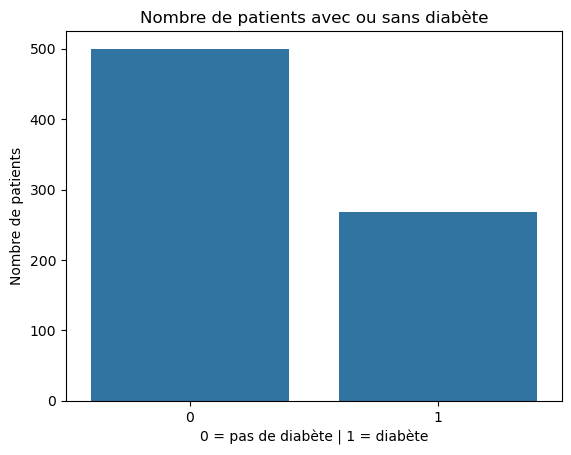

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter combien de patients ont le diabète (1) et combien ne l'ont pas (0)
sns.countplot(x='Outcome', data=df)
plt.title("Nombre de patients avec ou sans diabète")
plt.xlabel("0 = pas de diabète | 1 = diabète")
plt.ylabel("Nombre de patients")
plt.show()


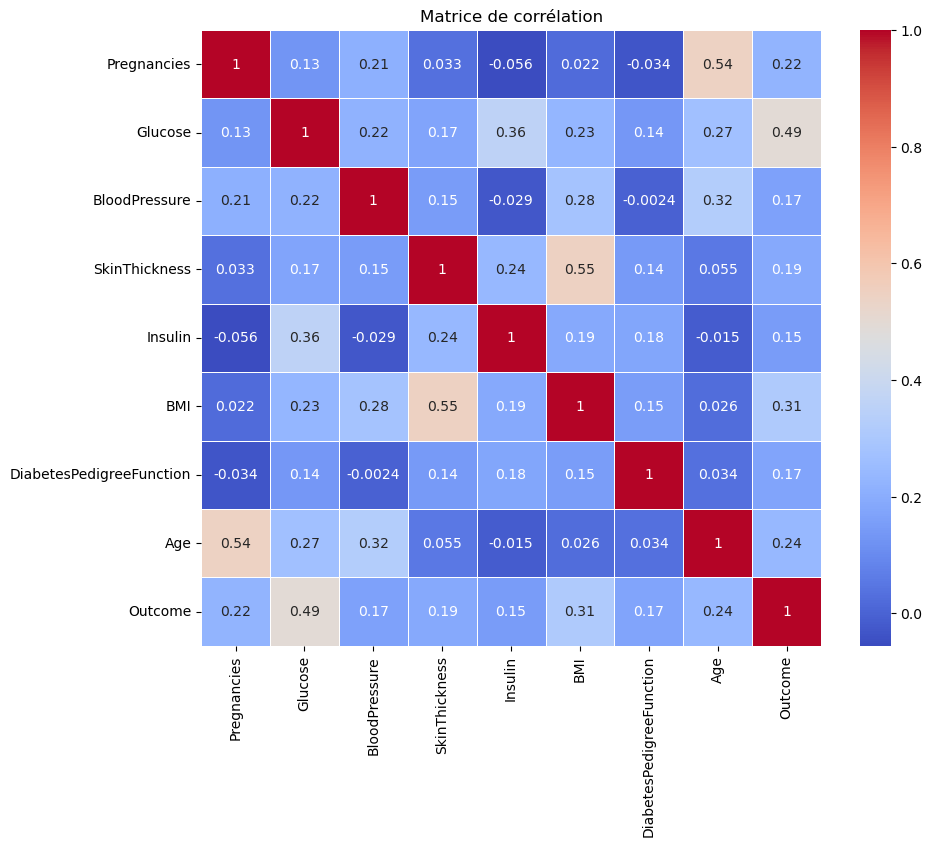

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Séparer les colonnes en variables d'entrée (X) et la sortie (y)
X = df.drop("Outcome", axis=1)  # On enlève la colonne "Outcome"
y = df["Outcome"]               # C'est ce qu'on veut prédire (0 ou 1)

# Diviser le dataset en données d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Afficher les dimensions
print("Données d'entraînement :", X_train.shape)
print("Données de test        :", X_test.shape)


Données d'entraînement : (614, 8)
Données de test        : (154, 8)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer le modèle
model = LogisticRegression(max_iter=1000)  # max_iter pour être sûr qu'il converge

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("📊 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📋 Rapport de classification :")
print(classification_report(y_test, y_pred))
print("\n🧱 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


📊 Accuracy : 0.7597402597402597

📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


🧱 Matrice de confusion :
[[82 17]
 [20 35]]


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Créer le modèle
tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Évaluation
print("🌳 Accuracy (Decision Tree) :", accuracy_score(y_test, y_pred_tree))
print("\n📋 Rapport de classification :")
print(classification_report(y_test, y_pred_tree))
print("\n🧱 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_tree))


🌳 Accuracy (Decision Tree) : 0.7272727272727273

📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


🧱 Matrice de confusion :
[[74 25]
 [17 38]]


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Créer le modèle Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Évaluation
print("🌳 Accuracy (Decision Tree) :", accuracy_score(y_test, y_pred_tree))
print("\n📋 Rapport de classification :")
print(classification_report(y_test, y_pred_tree))
print("\n🧱 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_tree))


🌳 Accuracy (Decision Tree) : 0.7272727272727273

📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


🧱 Matrice de confusion :
[[74 25]
 [17 38]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Créer le modèle KNN avec k=5 voisins
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entraîner
knn_model.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test)

# Évaluation
print("👥 Accuracy (KNN) :", accuracy_score(y_test, y_pred_knn))
print("\n📋 Rapport de classification :")
print(classification_report(y_test, y_pred_knn))
print("\n🧱 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_knn))


👥 Accuracy (KNN) : 0.6558441558441559

📋 Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        99
           1       0.52      0.62      0.56        55

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.66      0.66       154


🧱 Matrice de confusion :
[[67 32]
 [21 34]]
